In [46]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import fft
from scipy.fftpack import dct, idct
from sklearn import linear_model
from pydub import AudioSegment
import os
import scipy.signal as sig

In [47]:
import glob
audio_files = glob.glob('./*.wav')

In [48]:
audio_files[0][2:-4]

'guitar'

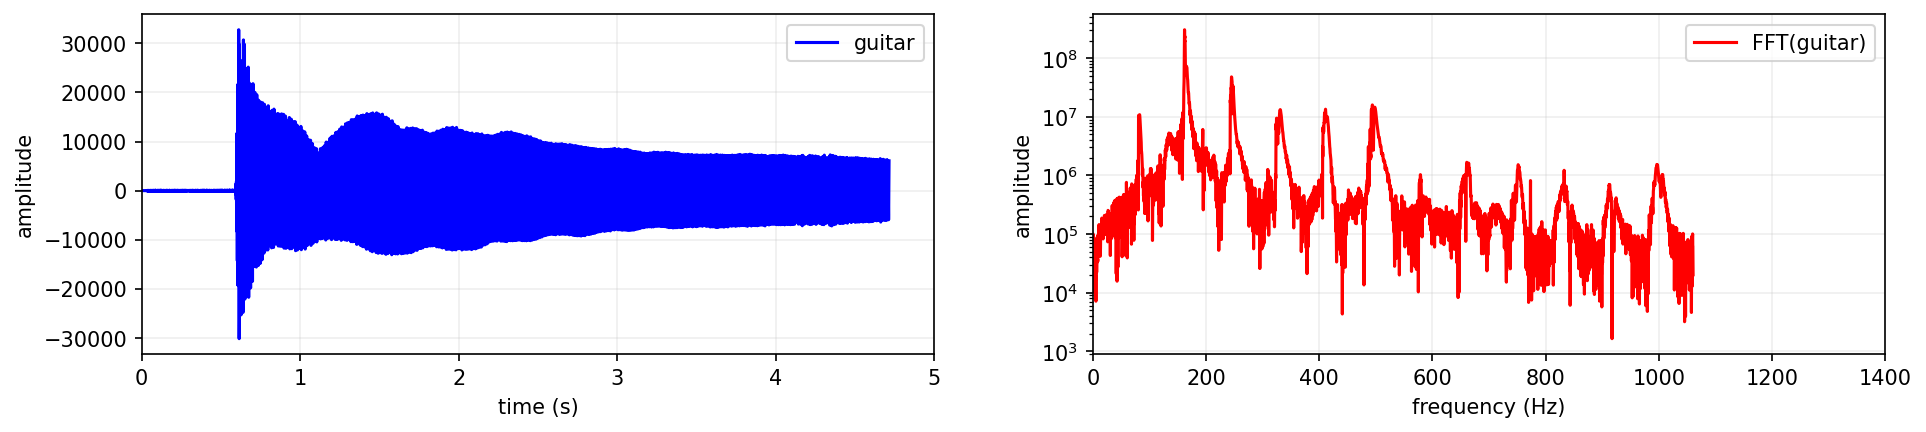

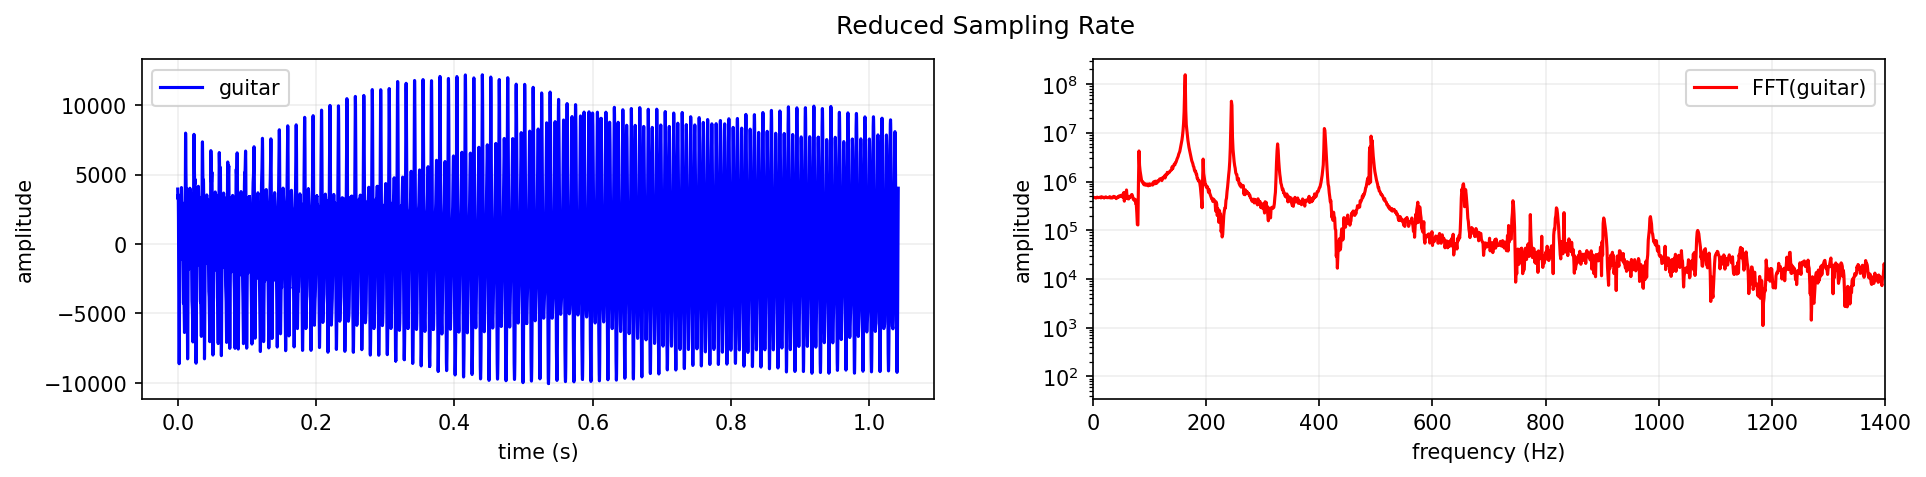

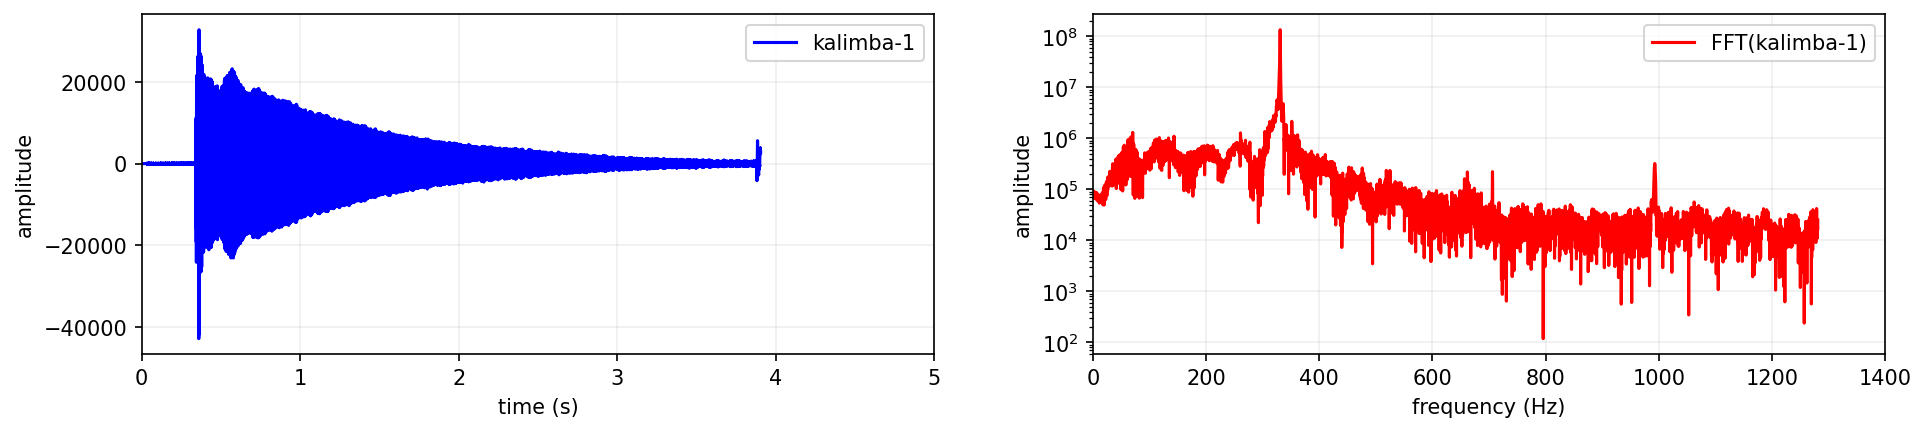

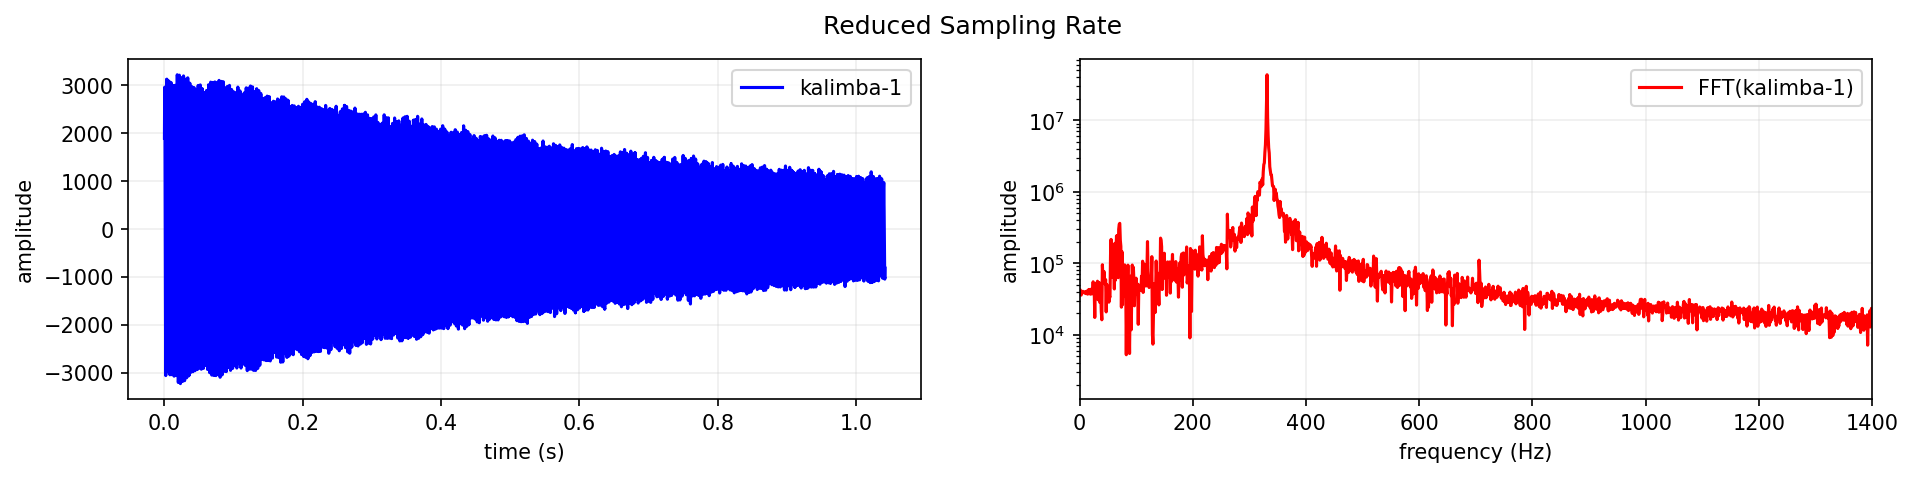

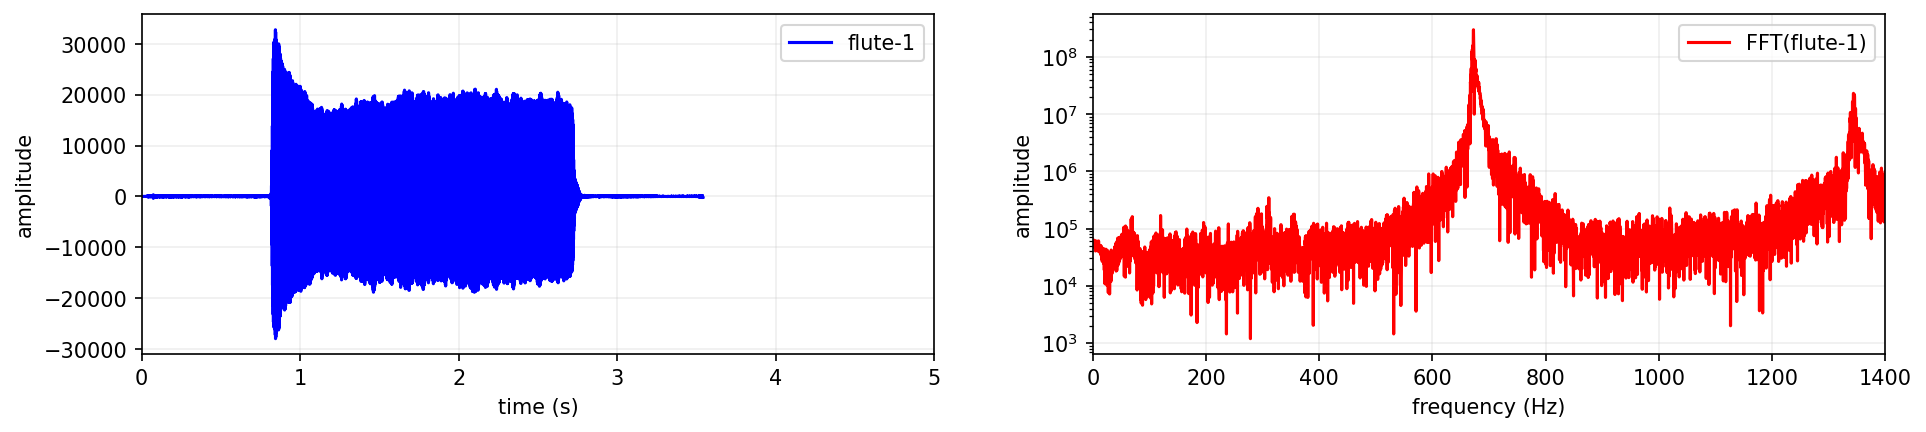

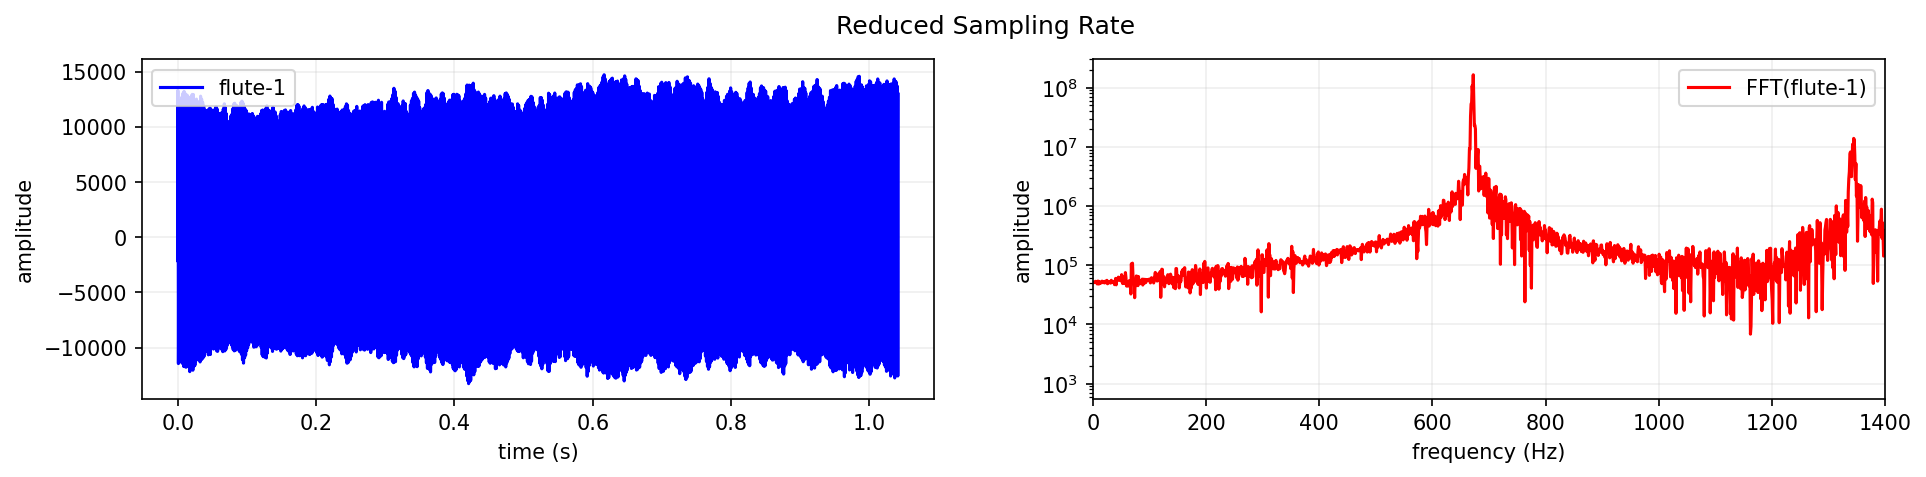

In [5]:
for audio in audio_files:
    plt.figure(dpi = 150, figsize = (15, 3))

    plt.subplot(1,2,1)
    plt.grid(alpha = 0.2)
    rate, data = wavfile.read(audio)
    signal = (data/np.max(data)) * 32767
    length = signal.shape[0] / rate           ### Max duration in sec
    t = np.linspace(0., length, signal.shape[0])
    plt.plot(t, signal, 'b',label = audio[2:-4])
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.xlim(0,5)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.grid(alpha = 0.2)
    N = int(rate*length)
    yf = fft.rfft(data)
    xf = fft.rfftfreq(N, 1 / rate)
    end = 5000
    plt.plot(xf[:end],np.abs(yf[:end]), 'r', label = 'FFT('+str(audio[2:-4]+')'))
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')
    plt.xlim(0,1400)
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    
    plt.figure(dpi = 150, figsize = (15, 3))
    plt.suptitle('Reduced Sampling Rate')
    
    plt.subplot(1,2,1)
    plt.grid(alpha = 0.2)
    signal_ = data[50000:100000]               
    signal_ = (signal_/np.max(signal)) * 32767
    length = signal_.shape[0] / rate           
    t_ = np.linspace(0., length, signal_.shape[0])

    plt.plot(t_, signal_, 'b',label = audio[2:-4])
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    # plt.xlim(0,5)
    plt.legend()

    plt.subplot(1,2,2)
    plt.grid(alpha = 0.2)
    N = int(rate*length)
    yf = fft.rfft(signal_)
    xf = fft.rfftfreq(N, 1 / rate)
    end = 5000
    plt.plot(xf[:end],np.abs(yf[:end]), 'r', label = 'FFT('+str(audio[2:-4]+')'))
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')
    plt.xlim(0,1400)
    plt.yscale('log')
    plt.legend()
    plt.show()
    

# Audio Signal, its FFT, and Spectrogram

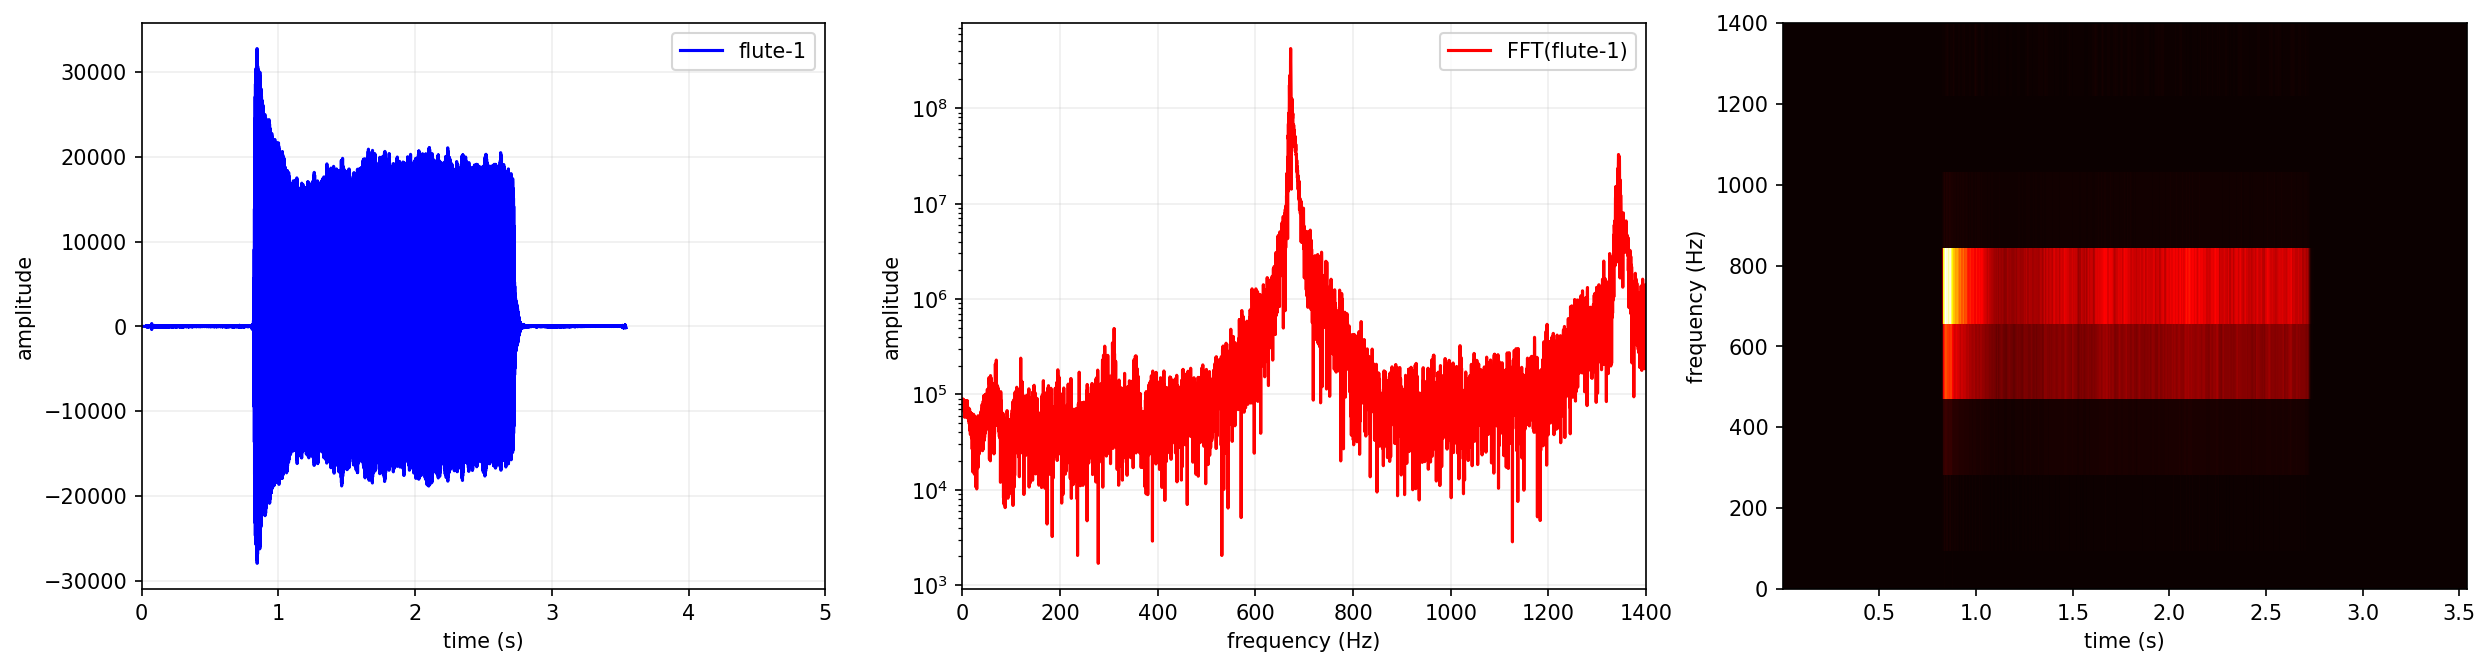

In [50]:
audio = audio_files[2]

plt.figure(dpi = 150, figsize = (20, 5))

plt.subplot(1,3,1)
plt.grid(alpha = 0.2)
rate, data = wavfile.read(audio)
signal = (data/np.max(data)) * 32767
length = signal.shape[0] / rate           ### Max duration in sec
t = np.linspace(0., length, signal.shape[0])
plt.plot(t, signal, 'b',label = audio[2:-4])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim(0,5)
plt.legend()

plt.subplot(1,3,2)
plt.grid(alpha = 0.2)
N = int(rate*length)
yf = fft.rfft(signal)
xf = fft.rfftfreq(N, 1 / rate)
end = 5000
plt.plot(xf[:end],np.abs(yf[:end]), 'r', label = 'FFT('+str(audio[2:-4]+')'))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,1400)
plt.yscale('log')
plt.legend()

plt.subplot(1,3,3)
f,t,Sxx = sig.spectrogram(data,rate)
plt.pcolormesh(t,f,Sxx, cmap="hot")
plt.ylim(0,1400)
plt.ylabel('frequency (Hz)')
plt.xlabel('time (s)')
plt.show()

# Reduced Sampling Rate

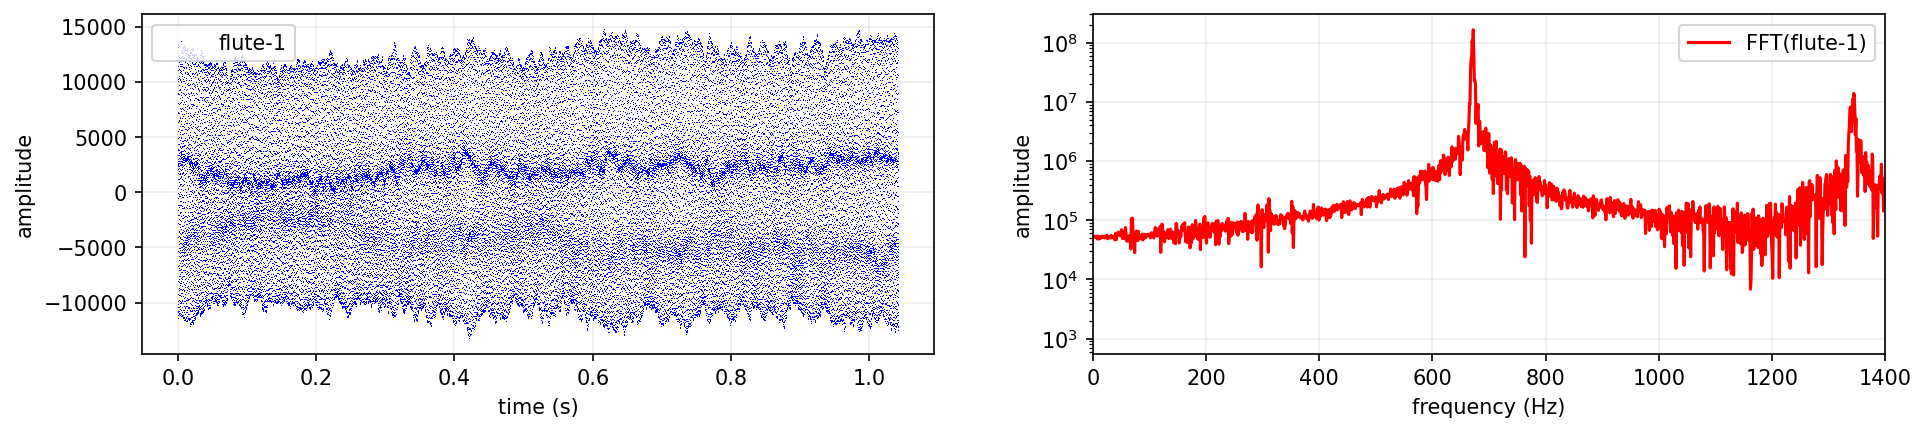

In [7]:
plt.figure(dpi = 150, figsize = (15, 3))

plt.subplot(1,2,1)
plt.grid(alpha = 0.2)
signal_ = data[50000:100000]               
signal_ = (signal_/np.max(signal)) * 32767
length = signal_.shape[0] / rate           ### Max duration in sec
t_ = np.linspace(0., length, signal_.shape[0])

plt.plot(t_, signal_, 'b,',label = audio[2:-4])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(1,2,2)
plt.grid(alpha = 0.2)
N = int(rate*length)
yf = fft.rfft(signal_)
xf = fft.rfftfreq(N, 1 / rate)
end = 5000
plt.plot(xf[:end],np.abs(yf[:end]), 'r', label = 'FFT('+str(audio[2:-4]+')'))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,1400)
plt.yscale('log')
plt.legend()
plt.show()

# Random Sampling

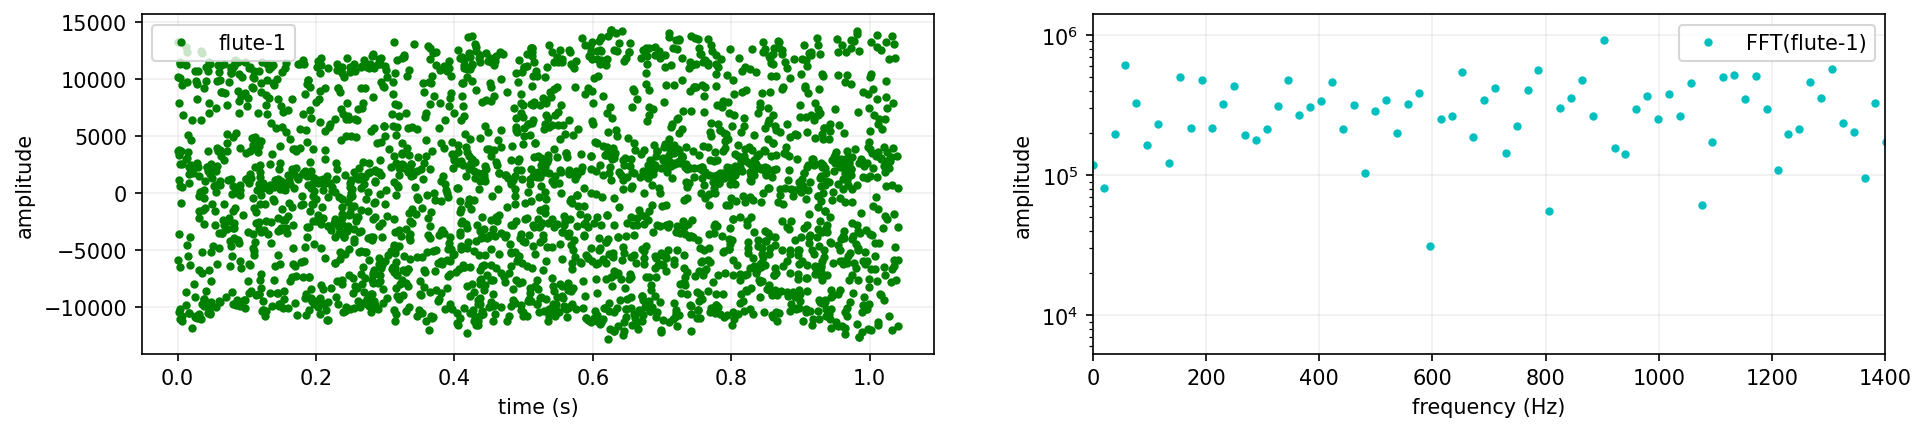

In [42]:
percent = 0.05
numIndices = int(percent*len(signal_))
allIndices = np.random.randint(0, len(signal_),len(signal_))
indices = sorted(allIndices[:numIndices])

plt.figure(dpi = 150, figsize = (15, 3))
plt.subplot(1,2,1)
plt.grid(alpha = 0.2)

signal_rs = np.zeros(numIndices)
t_rs = np.zeros(numIndices)

for idx, val in enumerate(indices):
    signal_rs[idx] = signal_[val]
    t_rs[idx] = t_[val]
    
plt.plot(t_rs, signal_rs, 'g.',label = audio[2:-4])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(1,2,2)
plt.grid(alpha = 0.2)
N_rs = int(signal_rs.shape[0])
yf = fft.rfft(signal_rs)
xf = fft.rfftfreq(N_rs, 1 / rate)
end = 5000
plt.plot(xf[:end],np.abs(yf[:end]), 'c.', label = 'FFT('+str(audio[2:-4]+')'))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,1400)
plt.yscale('log')
plt.legend()
plt.show()

# Discrete Cosine Transforms

In [44]:
d = np.identity(N_rs)

In [41]:
d = dct(d)
A = d[indices]

IndexError: index 2520 is out of bounds for axis 0 with size 2500

In [37]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(A, signal_rs)
# recons = idct(lasso.coef_.reshape((N, 1)), axis=0)
# recons = recons.reshape(N)
# timeRecon = np.linspace(0., length, recons.shape[0])

ValueError: Expected 2D array, got 1D array instead:
array=[52646769.13095238 52643578.16311687 52610676.78058637 ...
  3344494.61865826  3587669.30013461  3071981.58463017].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.